# Online Job Posting- IT Job Classification

<b>This section seeks to classify if a job posting is related to IT sector or not which is a business objective

<b>Import libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from nltk.stem import PorterStemmer
from textblob import Word
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer, TfidfTransformer
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm, decomposition, ensemble
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')
import nltk
import re
import string
nltk.download('punkt')
nltk.download('stopwords')

C:\Users\Aanchal\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Aanchal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Aanchal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

<b>Load dataset

In [2]:
# read csv into a DataFrame
data = pd.read_csv('data job posts.csv',parse_dates= ['date'])
data.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,...,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,...,NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


<b>Selecting useful columns for analysis

In [5]:
df= data[["jobpost", "IT"]]
df.head()

,jobpost,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,False
1,International Research & Exchanges Board (IREX...,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,True


<b>Data-Peprocessing steps--

In [6]:
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub('\s+', ' ', x))  # remove newlines
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub("\'", "", x))  # remove single quotes
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub('\S*@\S*\s?', '', x))  # remove emails
re1 = '(www)'  # Web address 
re2 = '(\\.)'  # Any Single Character 
re3 = '((?:[a-z][a-z0-9_]*))'  # Variable Name 
rg = re.compile(re1 + re2 + re3, re.IGNORECASE | re.DOTALL)
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub(rg, "", x))
df.jobpost = df.jobpost.apply(lambda x: re.sub('(\\d+)', "", x))  # remove numbers

<b>Tokenisation

In [7]:
df['jobpost_token'] = df.jobpost.map(word_tokenize)
df.jobpost_token.head()

0    [AMERIA, Investment, Consulting, Company, JOB,...
1    [International, Research, &, Exchanges, Board,...
2    [Caucasus, Environmental, NGO, Network, (, CEN...
3    [Manoff, Group, JOB, TITLE, :, BCC, Specialist...
4    [Yerevan, Brandy, Company, JOB, TITLE, :, Soft...
Name: jobpost_token, dtype: object

<b>Removing Punctuations,convrsion to lowercase,stopwords removal & Lemmatization

In [8]:
def lemmit(tokens):
    tokens_nop = [t for t in tokens if t not in string.punctuation]
    tokens_nop = [t.lower() for t in tokens_nop]
    # wnl = nltk.WordNetLemmatizer()
    stop = stopwords.words('english')
    stop.extend(
        ['armenian', 'armenia', 'job', 'title', 'position', 'location', 'responsibilities', 'application', 'procedures',
         'deadline', 'required', 'qualifications', 'renumeration', 'salary', 'date', 'company', 'yerevan',
         'eligibility', 'january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september',
         'october', 'november', 'december'])
    tokens_nostop = [t for t in tokens_nop if t not in stop]
    # tokens_lem = [wnl.lemmatize(t) for t in tokens_nostop]
    tokens_clean = [t for t in tokens_nostop if len(t) >= 3] 
    lem = nltk.WordNetLemmatizer()
    tokens_lem = [lem.lemmatize(t) for t in tokens_clean]
    return tokens_lem

In [9]:
df['jobpost_processed'] =df.jobpost_token.apply(lemmit)

In [10]:
df['jobpost_processed'].head()

0    [ameria, investment, consulting, chief, financ...
1    [international, research, exchange, board, ire...
2    [caucasus, environmental, ngo, network, cenn, ...
3    [manoff, group, bcc, specialist, manila, phili...
4    [brandy, software, developer, rendering, techn...
Name: jobpost_processed, dtype: object

In [13]:
df1 = df[['jobpost_processed','IT']]
df1.head()

,jobpost_processed,IT
0,"[ameria, investment, consulting, chief, financ...",False
1,"[international, research, exchange, board, ire...",False
2,"[caucasus, environmental, ngo, network, cenn, ...",False
3,"[manoff, group, bcc, specialist, manila, phili...",False
4,"[brandy, software, developer, rendering, techn...",True


<b>Distribution of target column

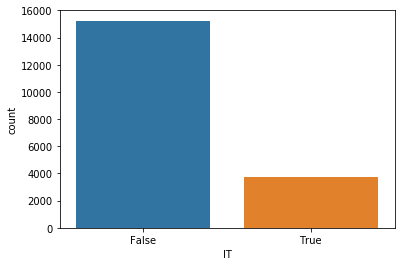

In [20]:
import seaborn as sns
sns.countplot(x="IT", data=df1)

In [21]:
df1['jobpost_processedtext'] = df1.jobpost_processed.apply(lambda x: ' '.join(x))

In [22]:
df1['jobpost_processedtext']

0        ameria investment consulting chief financial o...
1        international research exchange board irex ful...
2        caucasus environmental ngo network cenn countr...
3        manoff group bcc specialist manila philippine ...
4        brandy software developer rendering technical ...
5        boutique appollo saleswoman work hour one free...
6        osi assistance foundation branch office chief ...
7        international research exchange board irex non...
8        brandy assistant managing director coordinatin...
9        american embassy announcement number program a...
10       international research exchange board irex sho...
11       international research exchange board irex non...
12       institute sustainable community isc chief part...
13       food security regional cooperation stability p...
14       teleplus llc general manager manage control co...
15       netcall communication network administrator ne...
16       soc.stockholm utopian world championship descr.

<b>TF-IDF Vectorization

In [39]:
tfidf_transformer = TfidfVectorizer(max_df=0.7, min_df=3)
X_tfidf = tfidf_transformer.fit_transform(df1['jobpost_processedtext'])

In [40]:
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

In [41]:
# Use SVD to reduce dimensions
svd = TruncatedSVD(1500)
normalizer = Normalizer(copy=False)
nm = make_pipeline(svd, normalizer)
X_train = nm.fit_transform(X_tfidf)

In [42]:
explained_variance = svd.explained_variance_ratio_.sum()
print("Explained variance of the SVD step: {}%".format(int(explained_variance * 100)))

Explained variance of the SVD step: 79%


In [43]:
X_train.shape

(19001, 1500)

<b>Split the data into train & Test

In [46]:
X = X_train
y = df1.IT

In [47]:
# split the new DataFrame into training and testing sets
train_X, test_X, y_train, y_test = train_test_split(X, y, random_state=1)
print(train_X.shape)
print(test_X.shape)
print(y_train.shape)
print(y_test.shape)

(14250, 1500)
(4751, 1500)
(14250,)
(4751,)


<b>Model buildig usinf SVM

In [50]:
from sklearn import svm

clf = svm.SVC(gamma=0.001, C=100.)

clf.fit(train_X, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
predicted_y = clf.predict(test_X)

<b>Classification Report  & Confusion matrix

In [52]:
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix, classification_report

def pretty_print_conf_matrix(y_true, y_pred, 
                             classes,
                             normalize=False,
                             title='Confusion matrix',
                             cmap=plt.cm.Blues):
    """
    Mostly stolen from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

    Normalization changed, classification_report stats added below plot
    """

    cm = confusion_matrix(y_true, y_pred)

    # Configure Confusion Matrix Plot Aesthetics (no text yet) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True label', fontsize=12)
    plt.xlabel('Predicted label', fontsize=12)

    # Calculate normalized values (so all cells sum to 1) if desired
    if normalize:
        cm = np.round(cm.astype('float') / cm.sum(),2) #(axis=1)[:, np.newaxis]

    # Place Numbers as Text on Confusion Matrix Plot
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)

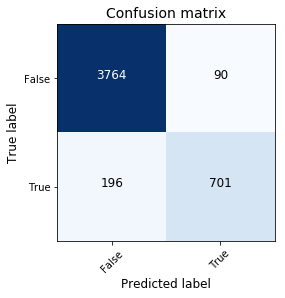

In [53]:
pretty_print_conf_matrix(y_true=y_test, y_pred=predicted_y, classes=["False", "True"])


In [54]:
rpt = classification_report(y_test, predicted_y)
print(rpt)

             precision    recall  f1-score   support

      False       0.95      0.98      0.96      3854
       True       0.89      0.78      0.83       897

avg / total       0.94      0.94      0.94      4751

